/Users/emilylin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.60819e-61): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Testing Mean Squared Error: 245796.03
Testing R-squared (R2) Score: 0.35
Training Mean Squared Error: 217121.78
Training R-squared (R2) Score: 0.42


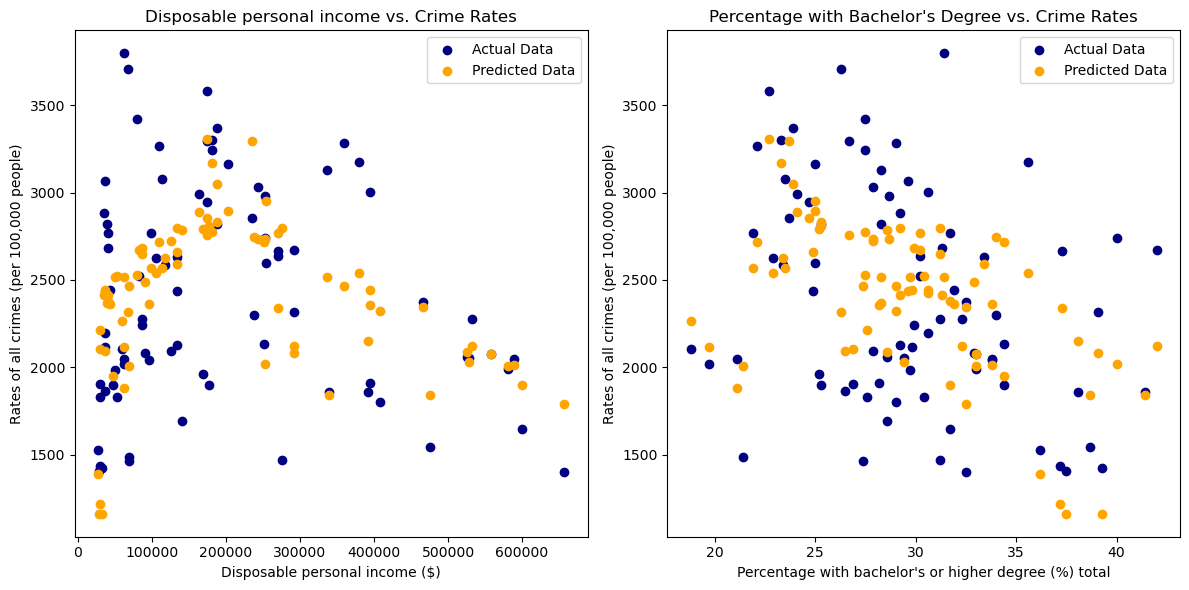

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

# Load your dataset (replace 'data.csv' with the actual file path)
data = pd.read_excel('/Users/emilylin/Downloads/Merged Dataset2.xlsx')

# Extract the independent variables (features) and the target variable
X = data[['Disposable personal income', "Percentage with bachelor's or higher degree (%)  total"]]
y = data['Rates of all crimes']

# Define a Z-Score threshold (e.g., 2 or -2 for a 95% confidence interval)
z_threshold = 2

# Remove outliers using Z-Score
z_scores = np.abs(stats.zscore(X))
X_no_outliers = X[(z_scores < z_threshold).all(axis=1)]
y_no_outliers = y[(z_scores < z_threshold).all(axis=1)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.25, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the Ridge regression model
alpha = 1  # You can adjust the regularization strength
model = Ridge(alpha=alpha)
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Calculate model performance metrics
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Calculate MSE for training data
y_train_pred = model.predict(X_train_poly)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Testing Mean Squared Error: {mse_test:.2f}")
print(f"Testing R-squared (R2) Score: {r2_test:.2f}")

print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Training R-squared (R2) Score: {r2_train:.2f}")

# Create two subplots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_test['Disposable personal income'], y_test, c='navy', label='Actual Data')
plt.scatter(X_test['Disposable personal income'], y_pred, c='orange', label='Predicted Data')
plt.xlabel('Disposable personal income ($)')
plt.ylabel('Rates of all crimes (per 100,000 people)')
plt.title('Disposable personal income vs. Crime Rates')
plt.legend()

plt.subplot(122)
plt.scatter(X_test["Percentage with bachelor's or higher degree (%)  total"], y_test, c='navy', label='Actual Data')
plt.scatter(X_test["Percentage with bachelor's or higher degree (%)  total"], y_pred, c='orange', label='Predicted Data')
plt.xlabel("Percentage with bachelor's or higher degree (%) total")
plt.ylabel('Rates of all crimes (per 100,000 people)')
plt.title('Percentage with Bachelor\'s Degree vs. Crime Rates')
plt.legend()

plt.tight_layout()
plt.show()